<a href="https://colab.research.google.com/github/jmamath/UVS-Probabilite-Statistiques/blob/master/Risque_empirique_et_biais_d'un_estimateur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Introduction
Objectifs pédagogiques:
1. Être capable de calculer les notions de risque quadratique d'un estimateur. 
1. Être capable de calculer le biais d'un estimateur.
1. Renforcer la comprehénsion qu'un estimateur est une variable aléatoire.

Commençons par importer quelques modules.


In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Risque quadratique d'un estimateur
Le risque quadratique est l'une des mesure les plus brute de la performance d'un estimateur. Cependant il offre un premier moyen de comparer divers estimateurs.

Plaçons nous dans le cas ou le jeu de données est issu d'une loi normale centrée réduite $\mathcal{N}(0,1)$.

[Text(0, 0.5, 'Fréquence'), Text(0.5, 0, 'Loi normale')]

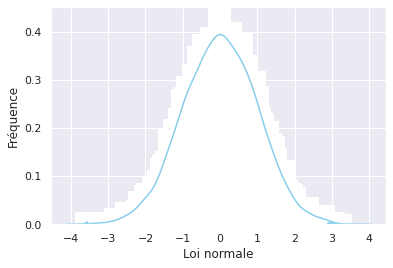

In [2]:
# Create a Standard Gaussian and sample from it
num_sample = 10000


# generate random numbers from N(0,1)
data_normal = norm.rvs(size=num_sample,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 20,'alpha':1})
ax.set(xlabel='Loi normale', ylabel='Fréquence')

# data = g.sample([num_sample]).numpy()



En connaissant uniquement la moyenne, l'estimateur de la variance issu du maxium de vraisemblance peut être utile car il incorpore la valeur de la moyenne. 

### Questions
* Implémenter l'estimateur de la moyenne et de la variance que vous avez trouvé avec le maximum de vraisemblance que nous noterons $T_{n}$ et $S_{n}$
* Implémenter un estimateur de la variance empririque $S_{n}^{2}$
* Implémenter un estimateur de la variance empririque corrigée $\hat S_{n}^{2}$

Pour rappel en notant la loi normale $\mathcal{N}(\mu,\sigma^{2})$
\begin{align}
T_{n} &= \frac{1}{n} \sum_{i=1}^{n} x_{i} \\
S_{n} &= \frac{1}{n} \sum_{i=1}^{n} (x_{i}-\mu)^{2}\\
S_{n}^{2} &= \frac{1}{n} \sum_{i=1}^{n} (x_{i}-T_{n})^{2}\\
\hat S_{n}^{2} &= \frac{1}{n-1} \sum_{i=1}^{n} (x_{i}-T_{n})^{2}
\end{align}

Vous utiliserez les fonctions ci-dessous à remplir.






In [11]:
def estimateur_moyenne_vraisemblance(data):
  """
  Input:
    data: Tableau de nombre: le jeu de données    
  Output:
    moyenne: estimation de la moyenne
  """
  

def estimateur_variance_vraisemblance(data, moyenne):
  """
  Input:
    data: Tableau de nombre: le jeu de données
    moyenne: la moyenne connue
  Output:
    var: estimation de la variance
  """
  

def estimateur_variance_empirique(data):
  """
  Input:
    data: Tableau de nombre: le jeu de données
  Output:
    var: estimation de la variance
  """


def estimateur_variance_empirique_corrigee(data):
  """
  Input:
    data: Tableau de nombre: le jeu de données
  Output:
    var: estimation de la variance
  """  
  moyenne_empirique = data.mean()
  return ((data-moyenne_empirique)**2).sum() / (len(data)-1)

Nous connaissons les valeurs des paramètres, nous pouvons calculer le risque quadratique de nos estimateurs:

* Rappelez la formule du risque quadratique.
* Éxécutez la cellule de code suivante pour estimer la moyenne de l'échantillon `data_normal` avec $T_{n}$ et sa variance avec respectivement $S_{n},S_{n}^{2}$ et $\hat S_{n}^{2}$.
* Calculez $EQM(T_{n}), EQM(S_{n}), EQM(S_{n}^{2}), EQM(\hat S_{n}^{2})$ en utilisant la fonction `risque_quad` à remplir.
* Comparez les divers estimateurs de la variance. Lequel est le plus bas ?

In [ ]:
estimation_moyenne = estimateur_moyenne_vraisemblance(data_normal)
variance_vraisemblance = estimateur_variance_vraisemblance(data_normal, 0)
variance_empirique = estimateur_variance_empirique(data_normal)
variance_empirique_corrigee = estimateur_variance_empirique_corrigee(data_normal)

In [ ]:
def risque_quad(estimation, parametre):
  """
  Input:
    estimation: Float, estimation donnee par un estimateur
    parametre: Float, la veritable valeur du parametre
  """
  

Dans le cas ou le jeu de données connu on peut utiliser $S_{n}$ pour estimer la variance. Dans le cas contraire, il est nécessaire d'utiliser des estimateurs se basant uniquement sur les données comme $S_{n}^{2}, \hat S_{n}^{2}$. 



## 2. Biais et variance d'un estimateur

On veut maintenant calculer le biais d'un estimateur. On va s'intéresser aux estimateurs de la variance, car nous avons vu que l'estimateur de la variance empirique était biaisé. On va illustrer ce que ça signifie.

Dans la suite on continue de considérer la variable aléatoire $X \sim \mathcal{N}(0,1)$ 

### Question
* Rapellez la définition du biais d'un estimateur
* Remplissez le code de `esperance_estimateur_variance` ci dessous pour calculer l'espérance d'un estimateur, vous utiliserez cette fonction pour calculer le biais.


In [18]:

def esperance_estimateur_variance(data, estimateur, taille_echantillon, iteration):
  """
  Input:
    data: Jeux de données complet
    estimateur: Estimateur à évaluer
    taille_echantillon: nombre d'éléments à tirer dans le jeu de données pour effectuer une itération
    iteration: Nombre d'itération pour estimer l'espérance.
  Output:
    biais: le biais de l'estimateur
  """
  


On va comparer plusieurs estimateurs de la variance, dans la suite l'indice représente le nombre d'exemples utilisé pour chaque estimation.
* Comparez le biais de la variance empirique $S_{10}^{2}$ et de la variance empirique corrigée $\hat S_{10}^{2}$.
* Comparez le biais de la variance empirique $S_{100}^{2}$ et de la variance empirique corrigée $\hat S_{100}^{2}$.

Qu'observez-vous ?


In [8]:
# Create a Standard Gaussian and sample from it
num_sample = 10000
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=num_sample,loc=0,scale=1)


In [25]:
var_np = esperance_estimateur_variance(data_normal, np.var, 10, 1000)
var_emp = esperance_estimateur_variance(data_normal, estimateur_variance_empirique, 10, 1000)
var_corr = esperance_estimateur_variance(data_normal, estimateur_variance_empirique_corrigee, 10, 1000)

In [26]:
print(1-var_np)
print(1-var_emp)
print(1-var_corr)

0.07990489498061926
0.0680301662591094
-0.006159373682312896


## 3. Ouverture
On a vu la notion de biais d'un estimateur, dans la suite, on s'intéressera aux propriétés de convergences de ces derniers. maintenant, on va illustrer la convergence d'un estimateur. On va donc voir pourquoi les big data permettent souvent d'obtenir de meilleurs estimateurs.